In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score

Using TensorFlow backend.


In [ ]:
#Importing Dataset
train_normalized = read_csv('train_normalized.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
test_normalized = read_csv('test_normalized.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
#We will firstly find the weights associated with each message. This will be useful when training the algorithm to 
#detect anomalies. The main purpose is to improve the learning rate of the algorithm

In [55]:
Time = train_dataset.loc[:, train_dataset.columns != 'Messages']
Messages = train_dataset.Messages

In [56]:
#compute class weights for each class
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(Messages), Messages)

In [57]:
#Class weight array
#class weights are important they will balance the features during learning process. 
#We have imbalanced dataset, so minority classes should be given more weightage and majority class less weightage.
class_weight

array([ 2.91685716,  2.60885949, 10.90083752,  0.18362919,  2.15504338,
        1.29015503,  3.40117069,  1.19066176,  2.75217796])

In [61]:
Message_type = np.unique(Messages)

In [64]:
#Unique message array
Message_type

array(['Ack-Message', 'At', 'I-Am', 'Read-Property', 'Tell',
       'Unconfirmed-Transfer', 'Who-Is', 'Who-Router', 'Write-Property'],
      dtype=object)

In [67]:
Messages.value_counts()

Read-Property           118133
Who-Router               18219
Unconfirmed-Transfer     16814
Tell                     10066
At                        8315
Write-Property            7882
Ack-Message               7437
Who-Is                    6378
I-Am                      1990
Name: Messages, dtype: int64

In [70]:
#storing weights
dict_weights = {}
for A, B in zip(Message_type, class_weight):
    dict_weights[A] = B

In [71]:
dict_weights

{'Ack-Message': 2.9168571556631258,
 'At': 2.608859490879936,
 'I-Am': 10.900837520938023,
 'Read-Property': 0.18362918631260247,
 'Tell': 2.155043380356315,
 'Unconfirmed-Transfer': 1.2901550295388764,
 'Who-Is': 3.4011706909166928,
 'Who-Router': 1.1906617633605943,
 'Write-Property': 2.7521779582170347}

In [ ]:
#To run the k-means algorithm, we need to find k value prior to applying the clustering technique

#Elbow method - The score is, in general, a measure of the input data on the k-means objective function 
#i.e. some form of intra-cluster distance relative to inner-cluster distance.

#Silhouette Analysis - he silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 
#The silhouette ranges from −1 to +1, where a high value indicates 
#that the object is well matched to its own cluster and poorly matched to neighboring clusters

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5179992186372331
For n_clusters = 3 The average silhouette_score is : 0.5151274974579599
For n_clusters = 4 The average silhouette_score is : 0.15487452358508264
For n_clusters = 5 The average silhouette_score is : 0.15653905848404548
For n_clusters = 6 The average silhouette_score is : 0.1476063487410652
For n_clusters = 7 The average silhouette_score is : 0.14780601973200974
For n_clusters = 8 The average silhouette_score is : 0.14713813012239121
For n_clusters = 9 The average silhouette_score is : 0.14859702467635305
For n_clusters = 10 The average silhouette_score is : 0.14361622477031158
For n_clusters = 11 The average silhouette_score is : 0.14405899242884468
For n_clusters = 12 The average silhouette_score is : 0.14548798848146882
For n_clusters = 13 The average silhouette_score is : 0.1500051609444253
For n_clusters = 14 The average silhouette_score is : 0.149

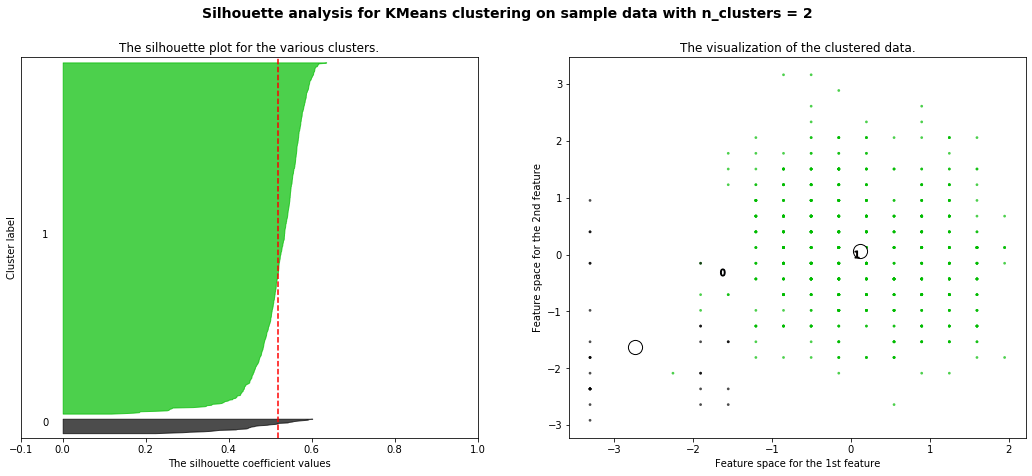

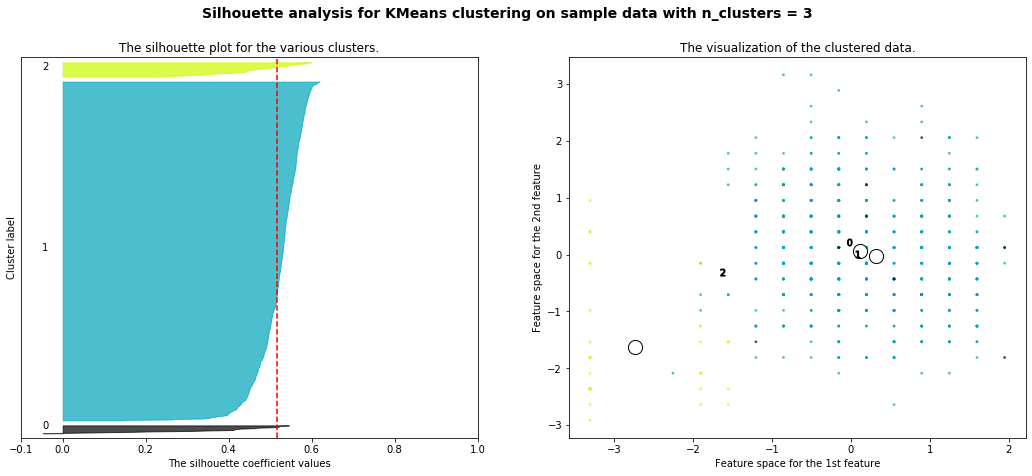

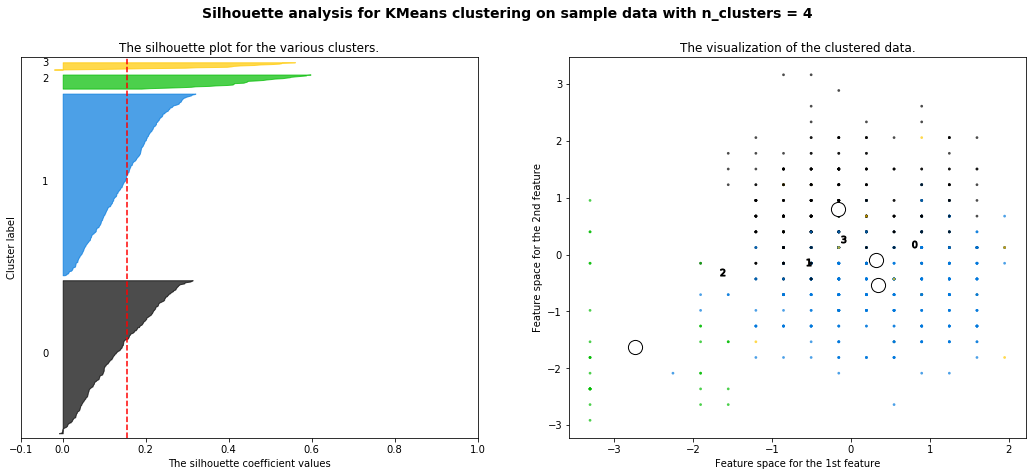

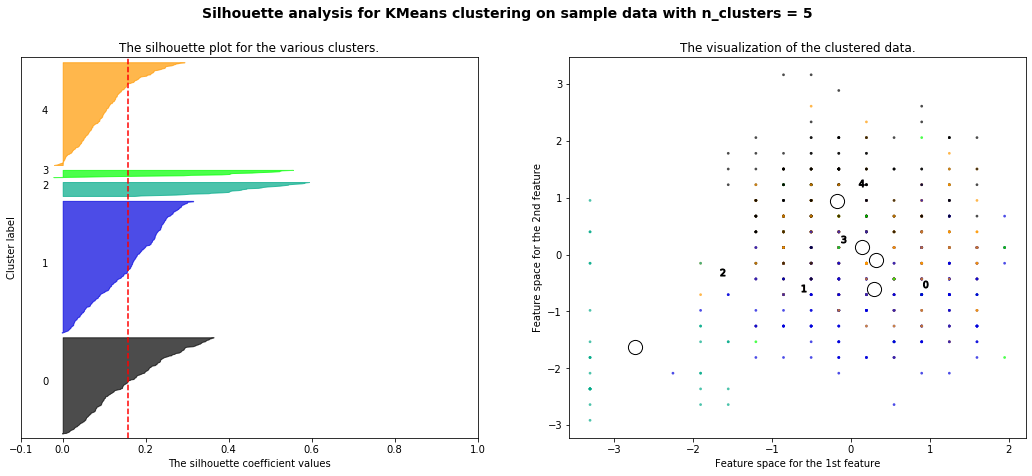

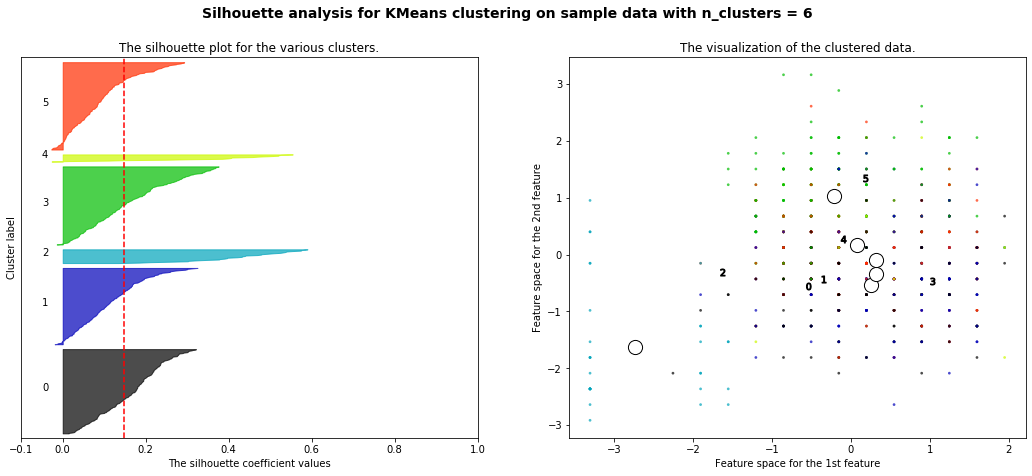

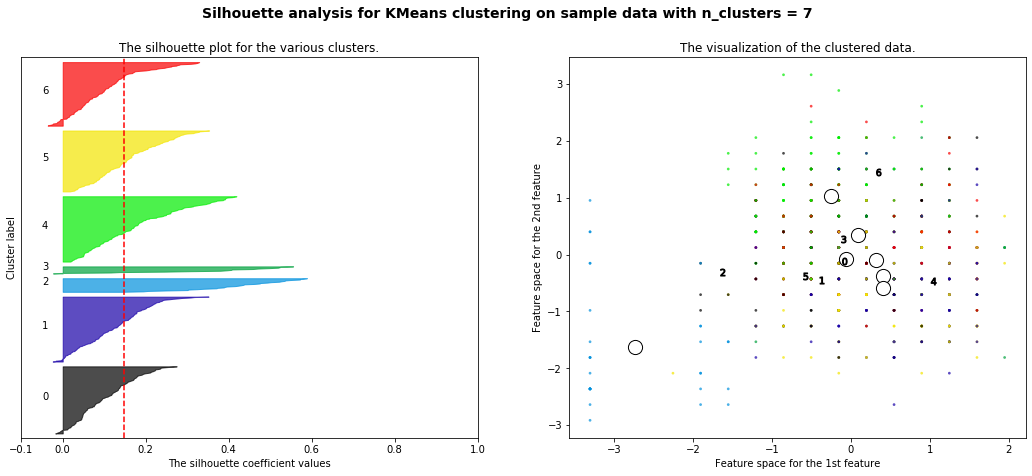

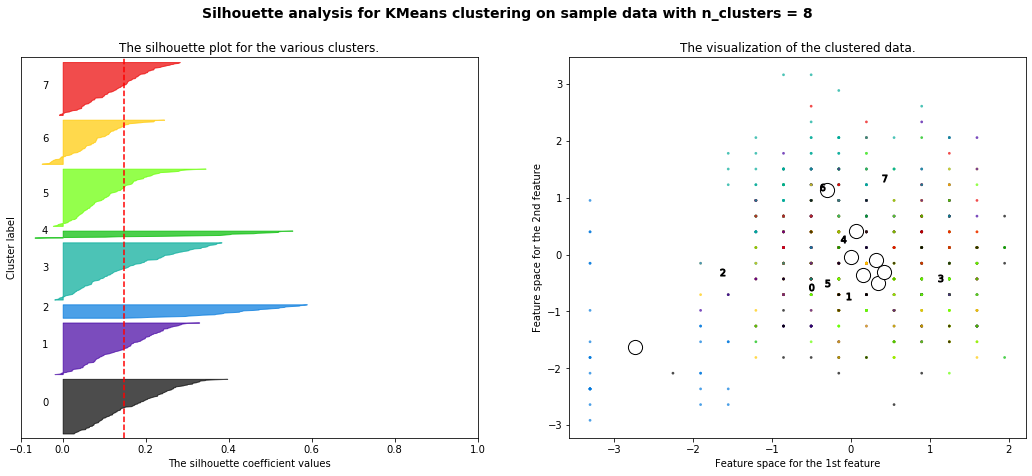

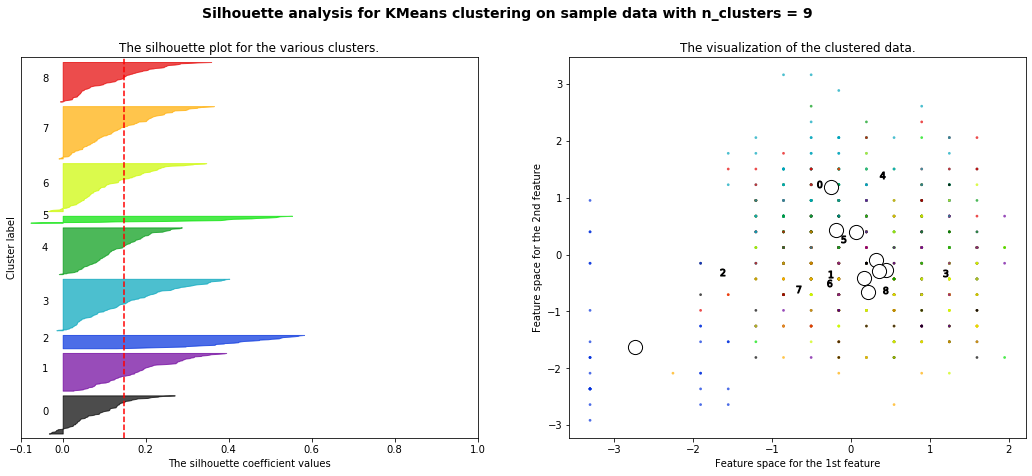

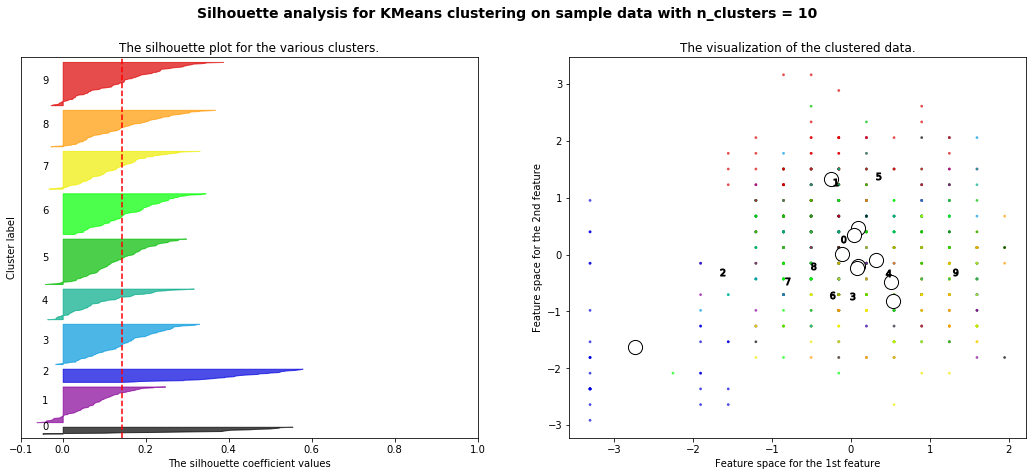

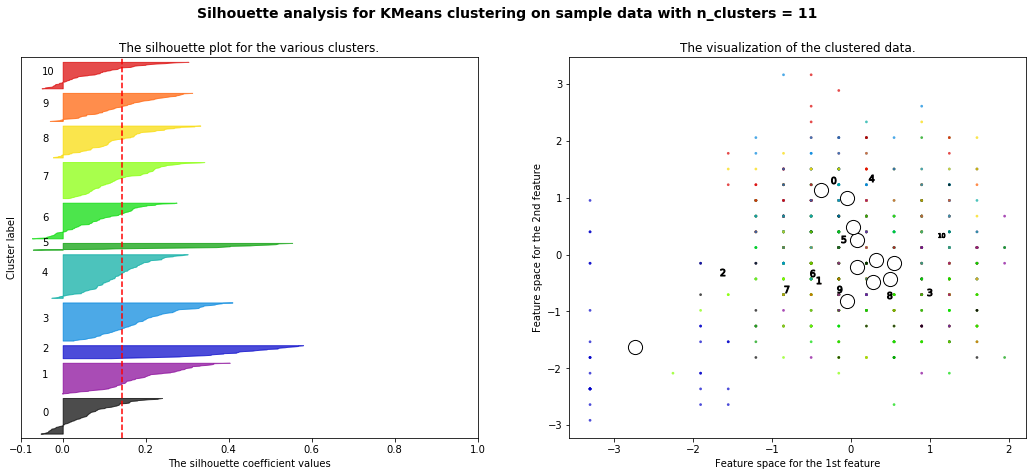

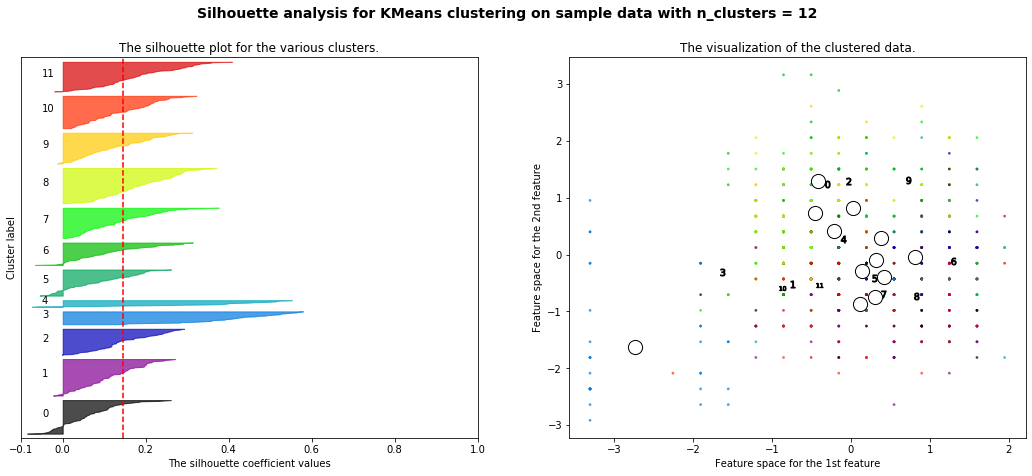

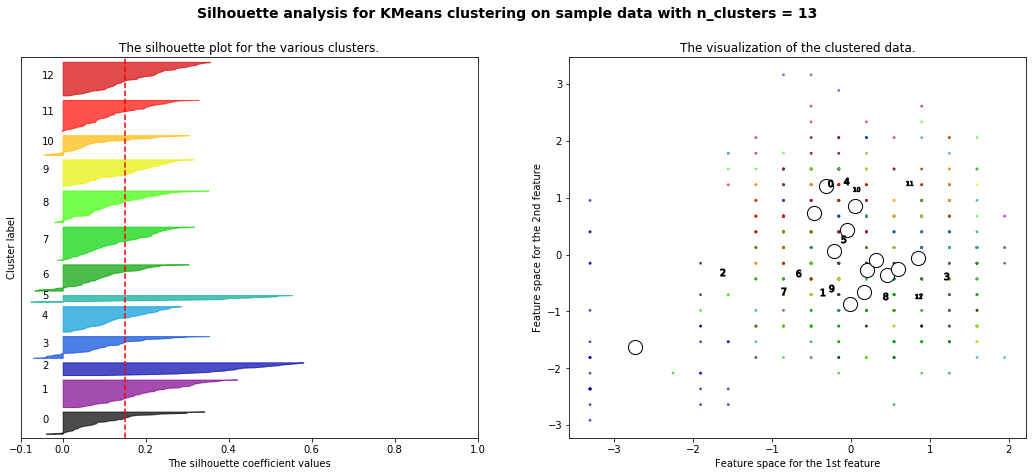

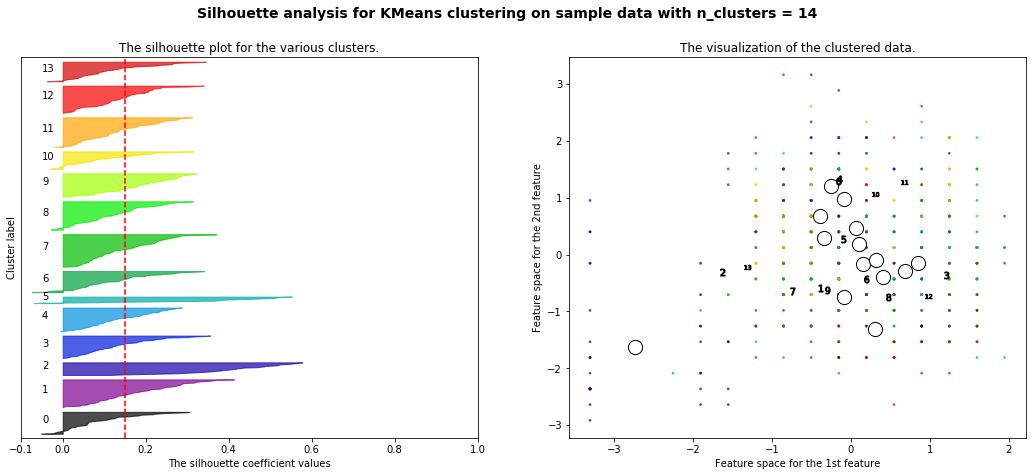

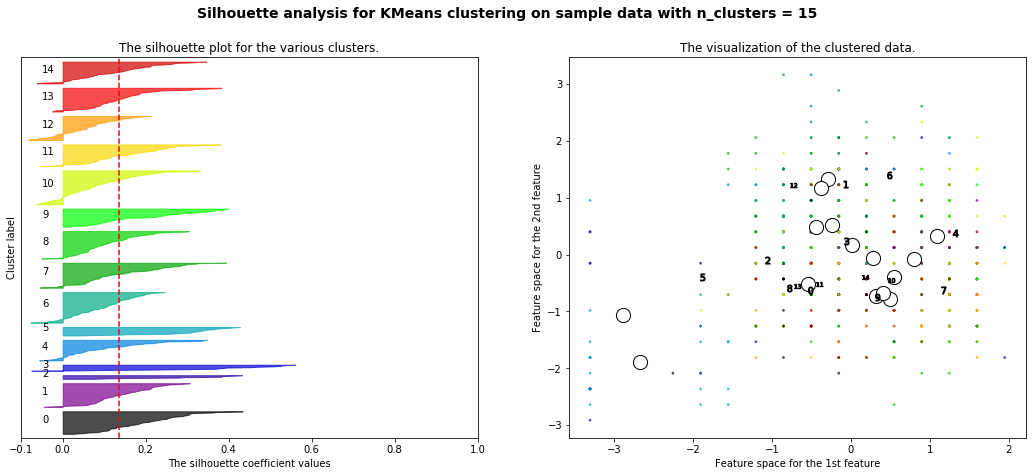

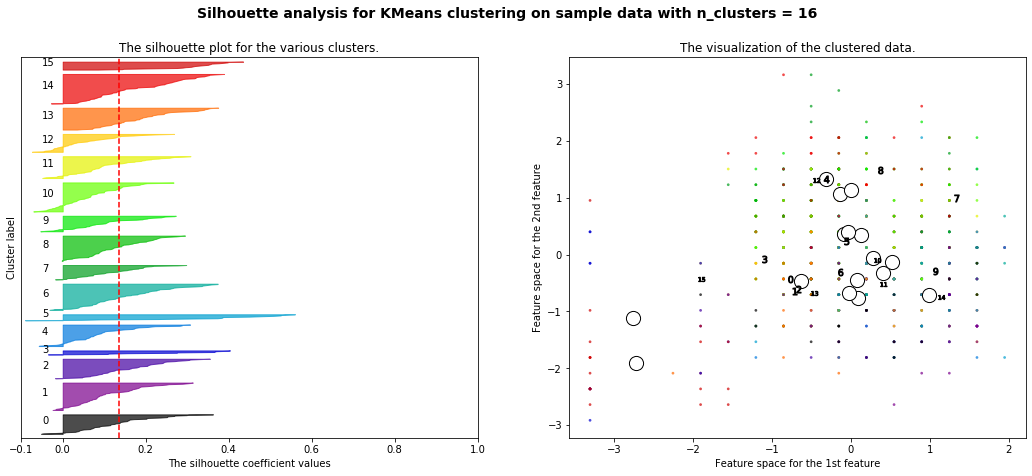

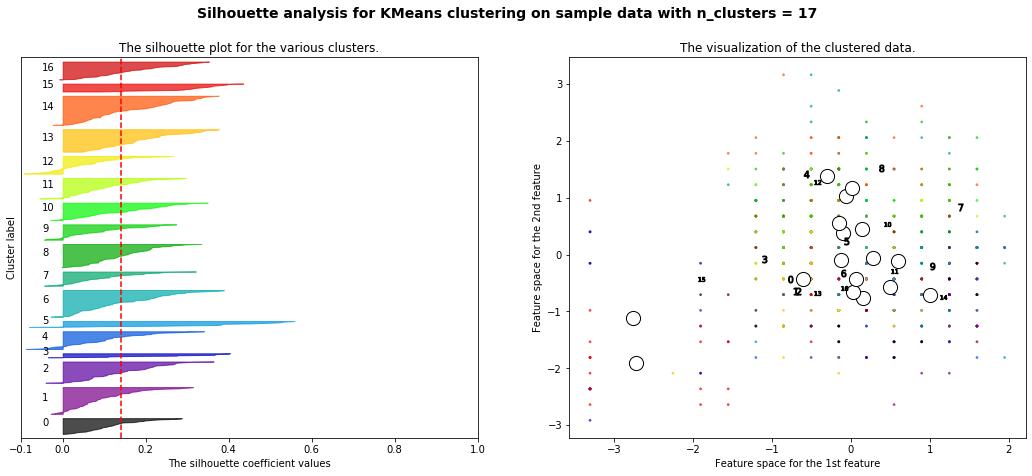

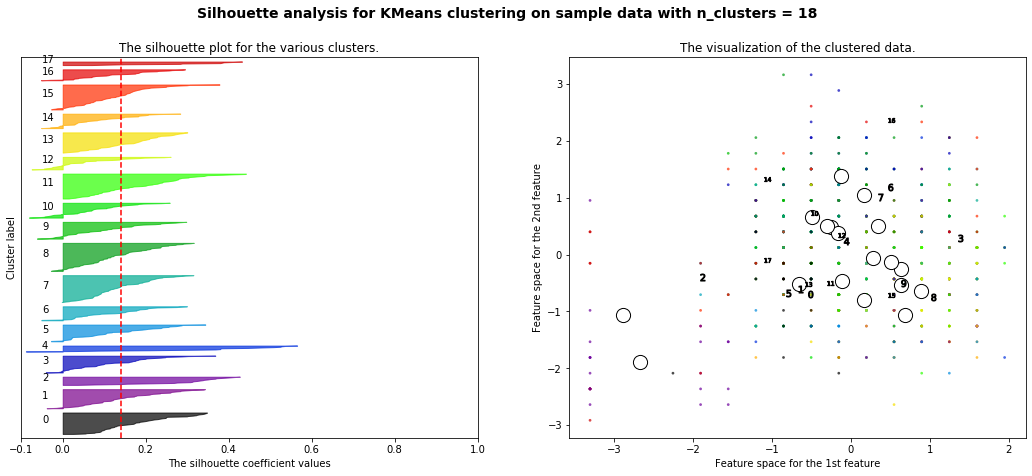

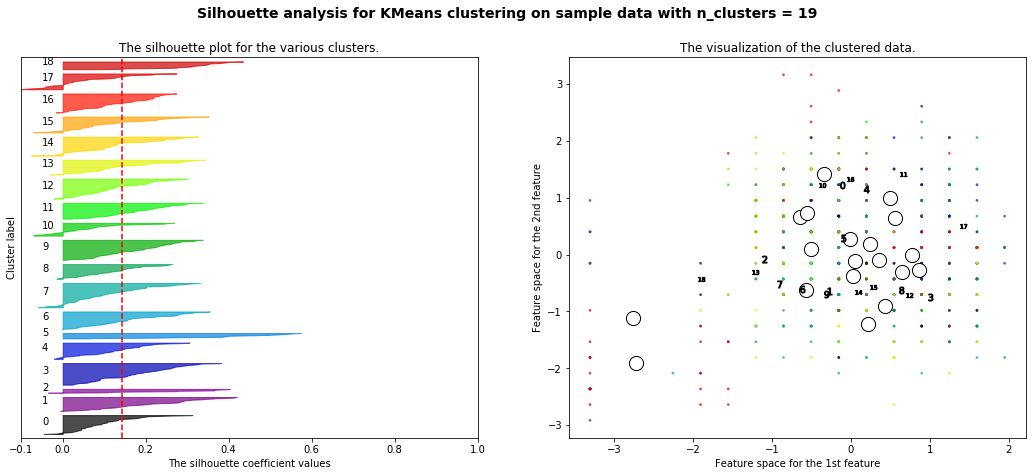

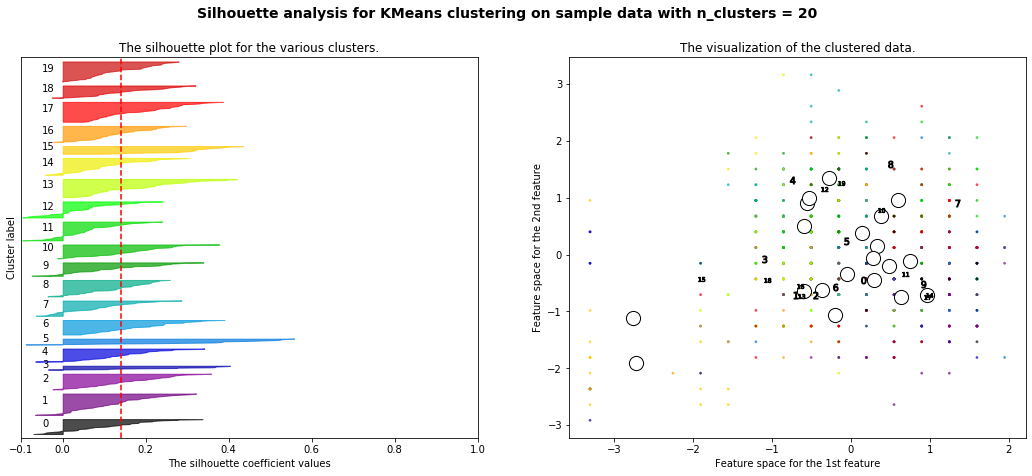

In [126]:
#sihouette analysis for the training data
import matplotlib.cm as cm
import numpy as np

print(__doc__)

x = train_normalized.values

for n_clusters in range(2,21):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Text(0, 0.5, 'WCSS')

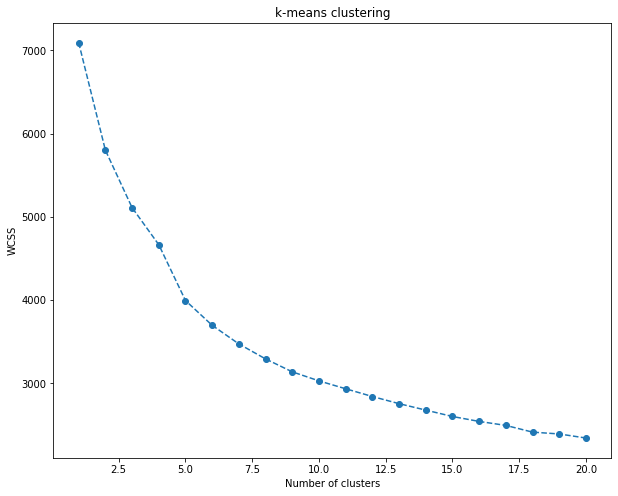

In [118]:
#Elbow Method
wcss = []
for i in range(1,21):
    kmeans_train = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_train.fit(train_normalized)
    wcss.append(kmeans_train.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.title('k-means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [119]:
#From the above observations, 3 clusters shows a very high silhouette score
#This means The silhouette ranges from −1 to +1, where a high value indicates 
#that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#on the other hand, 5 cluster seems to have a low score but a lower wcss which means increase in clustering performance.


In [120]:
#creating cluster centroids for k=3,4,5
#k-means algorithm function that creates the dataframe for clusters as well
def makeClusters(Data, num_clusters,max_iter_no, init_method, init_no, random_state_no):
    
    kmeans = KMeans(n_clusters= num_clusters, max_iter = max_iter_no, init = init_method, n_init = init_no, 
                    verbose=1, random_state=random_state_no)
    x = Data.values # or Finalized Data not sure?
    fitClusters_kmeans = kmeans.fit_predict(x)
    
    clusterCentroidsDf = pd.DataFrame(kmeans.cluster_centers_)
    clusForInfo = clusterCentroidsDf.copy()
    clusterInfo = clusForInfo
    clusterInfo.columns = Data.columns #clusterInfo shows the cluster information 

    # Concatenating the data for visualization 
    clustersDf = pd.DataFrame(fitClusters_kmeans)
    clustersDf.columns = ['cluster_predicted']
    combinedDf = pd.concat([Data, clustersDf], axis = 1).reset_index()

    return clusterInfo, clusterCentroidsDf, combinedDf, fitClusters_kmeans

#three clusters
clusterInfo_3, clusterCentroidsDf_3, combinedDf_3, fitClusters_kmeans_3 = makeClusters(Data = train_normalized,
                                                                                        max_iter_no = 100,
                                                                                        num_clusters = 3,
                                                                                        init_method = 'k-means++',
                                                                                        init_no = 1,
                                                                                        random_state_no = 44)

Initialization complete
Iteration 0, inertia 7419.3825530758395
Iteration 1, inertia 5370.944015073032
Iteration 2, inertia 5266.923300111211
Iteration 3, inertia 5212.735690433237
Iteration 4, inertia 5190.168379758898
Iteration 5, inertia 5181.024894642123
Iteration 6, inertia 5175.174967627044
Iteration 7, inertia 5171.353969255993
Iteration 8, inertia 5167.432853954478
Iteration 9, inertia 5163.94249261928
Iteration 10, inertia 5160.808842982715
Iteration 11, inertia 5156.910328443926
Iteration 12, inertia 5153.421652340762
Iteration 13, inertia 5151.399990907243
Iteration 14, inertia 5150.205436551819
Iteration 15, inertia 5149.071825303009
Iteration 16, inertia 5148.361499699021
Iteration 17, inertia 5147.947383625702
Iteration 18, inertia 5147.62497394544
Iteration 19, inertia 5147.333215907285
Iteration 20, inertia 5146.357815131978
Iteration 21, inertia 5143.374804610334
Iteration 22, inertia 5136.886639176254
Iteration 23, inertia 5129.376768779437
Iteration 24, inertia 5127.

In [121]:
#four clusters
clusterInfo_4, clusterCentroidsDf_4, combinedDf_4, fitClusters_kmeans_4 = makeClusters(Data = train_normalized,
                                                                                        max_iter_no = 100,
                                                                                        num_clusters = 4,
                                                                                        init_method = 'k-means++',
                                                                                        init_no = 1,
                                                                                        random_state_no = 44)

Initialization complete
Iteration 0, inertia 6901.555804740386
Iteration 1, inertia 5080.870363354498
Iteration 2, inertia 4959.480660854242
Iteration 3, inertia 4888.444766497566
Iteration 4, inertia 4853.324764150557
Iteration 5, inertia 4832.254633735831
Iteration 6, inertia 4810.692222515022
Iteration 7, inertia 4794.613949594543
Iteration 8, inertia 4781.88754769504
Iteration 9, inertia 4772.554129842256
Iteration 10, inertia 4767.21918810257
Iteration 11, inertia 4763.207769625129
Iteration 12, inertia 4761.302394237871
Iteration 13, inertia 4759.397193250173
Iteration 14, inertia 4754.900745348244
Iteration 15, inertia 4748.2543364662615
Iteration 16, inertia 4743.137380476692
Iteration 17, inertia 4738.479201373608
Iteration 18, inertia 4734.7567437970965
Iteration 19, inertia 4728.462241246391
Iteration 20, inertia 4723.5644975721225
Iteration 21, inertia 4720.549601453243
Iteration 22, inertia 4718.722220449872
Iteration 23, inertia 4718.026841200155
Iteration 24, inertia 471

In [122]:
#five clusters
clusterInfo_5, clusterCentroidsDf_5, combinedDf_5, fitClusters_kmeans_5 = makeClusters(Data = train_normalized,
                                                                                        max_iter_no = 100,
                                                                                        num_clusters = 5,
                                                                                        init_method = 'k-means++',
                                                                                        init_no = 1,
                                                                                        random_state_no = 44)

Initialization complete
Iteration 0, inertia 6305.196247756846
Iteration 1, inertia 4405.846040121937
Iteration 2, inertia 4285.882643664185
Iteration 3, inertia 4224.710867904241
Iteration 4, inertia 4191.257867919822
Iteration 5, inertia 4167.436066151893
Iteration 6, inertia 4142.669526779713
Iteration 7, inertia 4125.213872069405
Iteration 8, inertia 4114.978501490863
Iteration 9, inertia 4105.922942297626
Iteration 10, inertia 4099.329217697911
Iteration 11, inertia 4096.822040918527
Iteration 12, inertia 4095.1677513386717
Iteration 13, inertia 4094.3636072526815
Iteration 14, inertia 4093.665892056264
Iteration 15, inertia 4093.2530859584913
Iteration 16, inertia 4092.493809735931
Iteration 17, inertia 4089.358865052149
Iteration 18, inertia 4086.2921074077353
Iteration 19, inertia 4081.042095789076
Iteration 20, inertia 4078.3347339670013
Iteration 21, inertia 4075.605822070518
Iteration 22, inertia 4072.09408319739
Iteration 23, inertia 4069.7082029210515
Iteration 24, inertia

In [123]:
clusterInfo_3

Ack-Message        At      I-am  Read-Property      Tell  \
0    -0.165400  0.800401  0.181164       0.192382  0.489187   
1    -2.735486 -1.628621 -0.303063      -4.656611  1.974753   
2     0.354351 -0.551646 -0.129990       0.201112 -0.569536   

   Unconfirmed-Transfer    Who-Is  Who-Router  Write-Property  
0             -0.111949  0.232882   -0.165117        0.053874  
1             -0.752204 -0.982169   -1.156649       -0.172268  
2              0.153831 -0.120735    0.230582       -0.032229

In [124]:
clusterInfo_4

Ack-Message        At      I-am  Read-Property      Tell  \
0    -0.147800  0.887454  0.219096       0.184175  0.502879   
1    -2.735486 -1.628621 -0.303063      -4.656611  1.974753   
2     0.436738 -0.535127 -0.205637       0.200362 -0.630065   
3     0.031624 -0.128574  0.040479       0.207573 -0.092245   

   Unconfirmed-Transfer    Who-Is  Who-Router  Write-Property  
0             -0.193134  0.334251   -0.549258        0.116817  
1             -0.752204 -0.982169   -1.156649       -0.172268  
2              0.344320 -0.393246   -0.361321        0.014522  
3             -0.085050  0.226718    1.188875       -0.122064

In [125]:
clusterInfo_5

Ack-Message        At      I-am  Read-Property      Tell  \
0    -0.264444  0.894353  0.278677       0.198217  0.588469   
1    -2.735486 -1.628621 -0.303063      -4.656611  1.974753   
2     0.324425 -0.242618 -0.026287       0.230483 -0.353860   
3     0.287506 -0.455138 -0.235355       0.167559 -0.502478   
4     0.320410 -0.103743  0.279367       0.153519 -0.109018   

   Unconfirmed-Transfer    Who-Is  Who-Router  Write-Property  
0             -0.110957  0.422510   -0.307618       -0.126445  
1             -0.752204 -0.982169   -1.156649       -0.172268  
2             -0.005781 -1.082206    0.160693       -0.145212  
3              0.225192  0.737333    0.293308       -0.142273  
4             -0.183961 -0.277242    0.175795        6.315131

In [128]:
class_weight

array([ 2.91685716,  2.60885949, 10.90083752,  0.18362919,  2.15504338,
        1.29015503,  3.40117069,  1.19066176,  2.75217796])

In [137]:
class_weight.reshape(-1, 1)

array([[ 2.91685716],
       [ 2.60885949],
       [10.90083752],
       [ 0.18362919],
       [ 2.15504338],
       [ 1.29015503],
       [ 3.40117069],
       [ 1.19066176],
       [ 2.75217796]])

In [139]:
from sklearn.preprocessing import MinMaxScaler

#standardize the values to have a range between 0-1. Since our data is not guassian distributed and std deviation 
#is very small, mix max scaler works well. This also makes the weights very sensitive to outlier or anomalous data.
scaler = MinMaxScaler()
class_weight_norm = scaler.fit_transform(class_weight.reshape(-1,1))


In [140]:
class_weight_norm

array([[0.25503171],
       [0.2262931 ],
       [1.        ],
       [0.        ],
       [0.18394848],
       [0.10324758],
       [0.30022198],
       [0.09396408],
       [0.23966584]])

In [151]:
#shifting to a non-zero range to negate non-zero weights
for i in range(8):
    class_weight_norm[i] = class_weight_norm[i] + 0.01


In [152]:
class_weight_norm

array([[0.26503171],
       [0.2362931 ],
       [1.01      ],
       [0.01      ],
       [0.19394848],
       [0.11324758],
       [0.31022198],
       [0.10396408],
       [0.23966584]])

In [153]:
#Threshold finding for 3 clusters

#Data: u = Normal dataset, v = Set of cluster centroids; 
#Result: Distance score of each u from its respective nearest centroid
from scipy.spatial import distance
#class_weight
scaled_train_array = train_normalized.values
scaled_clusters3 = clusterInfo_3.values

def ThresholdCalculator(u,v,w):
    x = np.empty(shape = (len(v)-1),dtype='object')
    y = np.empty(shape = (len(u)-1),dtype='object')
 
    for i in range(len(u)-1):
        for j in range(len(v)-1):
            #Calculating dissimilarity or distance scores
            x[j] = distance.sqeuclidean(u[i],v[j],w)
        #minimum(distance of u[i] to each element in v): 
        y[i] = np.amin(x)
    Threshold = max(y)
    return(Threshold)

def AnomalyDetector(u,v,t,w):
    x = np.empty(shape = (len(v)-1),dtype='object')
    y = np.empty(shape = (len(u)-1),dtype='object')
    Status = y
    Threshold = float(t)
    for i in range(len(u)-1):
        for j in range(len(v)-1):
            #Calculating dissimilarity or distance scores
            x[j] = distance.sqeuclidean(u[i],v[j],w)
        #minimum(distance of u[i] to each element in v): 
        y[i] = np.amin(x)

    for k in range(len(u)-1):
        if y[k] <= Threshold:
            Status[k] = 'Normal'
        else:
            Status[k] = 'Anomaly'
    
    return(Status)

#Calculate Threshold:
Threshold = ThresholdCalculator(scaled_train_array,scaled_clusters3, class_weight_norm)
print("Threshold = ", Threshold)

#Check to see all normal data is decided 'Normal' 
Status = AnomalyDetector(scaled_train_array,scaled_clusters3,Threshold, class_weight_norm) #-Passed!
print("\nChecking Anomaly Detector:")
checker = 0
for i in Status:
    if i=='Anomaly':
        checker = 1
if checker == 0:
    print("   Anomaly Detector passed normal data check!")
else:
    print("   Check failed! Debug the function.")

Threshold =  25.21574972526369

Checking Anomaly Detector:
   Anomaly Detector passed normal data check!


In [154]:
def ThresholdCalculator(u,v,w):
    x = np.empty(shape = (len(v)-1),dtype='object')
    y = np.empty(shape = (len(u)-1),dtype='object')
 
    for i in range(len(u)-1):
        for j in range(len(v)-1):
            #Calculating dissimilarity or distance scores
            x[j] = distance.sqeuclidean(u[i],v[j],w)
        #minimum(distance of u[i] to each element in v): 
        y[i] = np.amin(x)
    #Threshold = max(y)
    return(y)

Threshold = ThresholdCalculator(scaled_train_array,scaled_clusters3, class_weight_norm)

In [156]:
Threshold = max(Threshold)

In [157]:
Threshold

25.21574972526369

In [175]:
#Threshold finding for 4 clusters

#Data: u = Normal dataset, v = Set of cluster centroids; 
#Result: Distance score of each u from its respective nearest centroid
from scipy.spatial import distance
#class_weight
scaled_train_array = train_normalized.values
scaled_clusters4 = clusterInfo_4.values

def ThresholdCalculator(u,v,w):
    x = np.empty(shape = (len(v)-1),dtype='object')
    y = np.empty(shape = (len(u)-1),dtype='object')
 
    for i in range(len(u)-1):
        for j in range(len(v)-1):
            #Calculating dissimilarity or distance scores
            x[j] = distance.sqeuclidean(u[i],v[j],w)
        #minimum(distance of u[i] to each element in v): 
        y[i] = np.amin(x)
    Threshold = max(y)
    return(Threshold)


#Calculate Threshold:
Threshold = ThresholdCalculator(scaled_train_array,scaled_clusters4, class_weight_norm)
print("Threshold = ", Threshold)

#Check to see all normal data is decided 'Normal' 
Status = AnomalyDetector(scaled_train_array,scaled_clusters4,Threshold, class_weight_norm) #-Passed!
print("\nChecking Anomaly Detector:")
checker = 0
for i in Status:
    if i=='Anomaly':
        checker = 1
if checker == 0:
    print("   Anomaly Detector passed normal data check!")
else:
    print("   Check failed! Debug the function.")

Threshold =  24.76985052125487

Checking Anomaly Detector:
   Anomaly Detector passed normal data check!


In [176]:
#Threshold finding for 5 clusters

#Data: u = Normal dataset, v = Set of cluster centroids; 
#Result: Distance score of each u from its respective nearest centroid
from scipy.spatial import distance
#class_weight
scaled_train_array = train_normalized.values
scaled_clusters5 = clusterInfo_5.values

def ThresholdCalculator(u,v,w):
    x = np.empty(shape = (len(v)-1),dtype='object')
    y = np.empty(shape = (len(u)-1),dtype='object')
 
    for i in range(len(u)-1):
        for j in range(len(v)-1):
            #Calculating dissimilarity or distance scores
            x[j] = distance.sqeuclidean(u[i],v[j],w)
        #minimum(distance of u[i] to each element in v): 
        y[i] = np.amin(x)
    Threshold = max(y)
    return(Threshold)


#Calculate Threshold:
Threshold = ThresholdCalculator(scaled_train_array,scaled_clusters5, class_weight_norm)
print("Threshold = ", Threshold)

#Check to see all normal data is decided 'Normal' 
Status = AnomalyDetector(scaled_train_array,scaled_clusters5,Threshold, class_weight_norm) #-Passed!
print("\nChecking Anomaly Detector:")
checker = 0
for i in Status:
    if i=='Anomaly':
        checker = 1
if checker == 0:
    print("   Anomaly Detector passed normal data check!")
else:
    print("   Check failed! Debug the function.")

Threshold =  25.969528642365162

Checking Anomaly Detector:
   Anomaly Detector passed normal data check!


In [180]:
#The threshold settings do not change much when we utilize 3,4 or 5 clusters. so we chose an optimal threshold of 25.
#Any value above this threshold will be considered an anomaly. Any euclidean distance bigger than 25 is classified as anomalous

#The next notebook will detail the testing process and the anomalous dataset creation